<h1 align="center">Volume 2: The Fourier Transform.</h1>

    <Sophie>
    <Section 3>
    <12/2/21>

<h2 align="center">Part 1: The Discrete Fourier Transform</h2>

In [33]:
from matplotlib import pyplot as plt
import IPython
from scipy.io import wavfile
import numpy as np

In [34]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12,3)      # Change plot size / aspect (you may adjust this).

In [118]:
class SoundWave(object):
    """A class for working with digital audio signals."""

    # Problem 1.1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.

        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        """
        self.rate = rate
        self.samples = samples

    # Problems 1.1 and 1.7
    def plot(self):
        """Plot the graph of the sound wave (time versus amplitude)."""
        seconds = [i/self.rate for i in range(1,len(self.samples)+1)]
        plt.plot(seconds, self.samples)
        plt.ylim(-32768,32767)
        plt.title("Time vs Amplitude")
        plt.show()

    # Problem 1.2
    def export(self, filename, force=False):
        """Generate a wav file from the sample rate and samples. 
        If the array of samples is not of type np.int16, scale it before exporting.

        Parameters:
            filename (str): The name of the wav file to export the sound to.
        """
        #check qualifications to scale
        if type(self.samples[0]) != np.int16 or force==True:
            scaled_samp = np.int16((self.samples/max(self.samples))*32767)
            wavfile.write(filename, self.rate, scaled_samp)
        else:
            wavfile.write(filename, self.rate, self.samples)
    
    # Problem 1.4
    def __add__(self, other):
        """Combine the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to add
                to the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the combined samples.

        Raises:
            ValueError: if the two sample arrays are not the same length.
        """
        
        #check if sample arrays from A and B are same length, raise valueError if not
        if len(self.samples) != len(other.samples):
            raise ValueError("The two sample arrays are not the same length.")
        else: #elementwise sum
            new_samp = [self.samples[i]+other.samples[i] for i in range(len(self.samples))]
    
        
        return SoundWave(self.rate, new_samp)
        
    # Problem 1.4
    def __rshift__(self, other):
        """Concatentate the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to concatenate
                to the samples contained in this object.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        #raise ValueError 
        if self.rate != other.rate:
            raise ValueError("The two sample rates are not the same.")
        else:
            new_samp = np.concatenate((self.samples, other.samples), axis=0)
        
        return SoundWave(self.rate, new_samp)
    
    # Problem 2.1
    def __mul__(self, other):
        """Convolve the samples from two SoundWave objects using circular convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.1 Incomplete")

    # Problem 2.2
    def __pow__(self, other):
        """Convolve the samples from two SoundWave objects using linear convolution.
        
        Parameters:
            other (SoundWave): An object containing the samples to convolve
                with the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the convolved samples.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        raise NotImplementedError("Problem 2.2 Incomplete")

    # Problem 2.4
    def clean(self, low_freq, high_freq):
        """Remove a range of frequencies from the samples using the DFT. 

        Parameters:
            low_freq (float): Lower bound of the frequency range to zero out.
            high_freq (float): Higher boound of the frequency range to zero out.
        """
        raise NotImplementedError("Problem 2.4 Incomplete")

### Problem 1.1

- Implement `SoundWave.__init__()`.
- Implement `SoundWave.plot()`.
- Use the `scipy.io.wavfile.read()` and the `SoundWave` class to plot `tada.wav`.

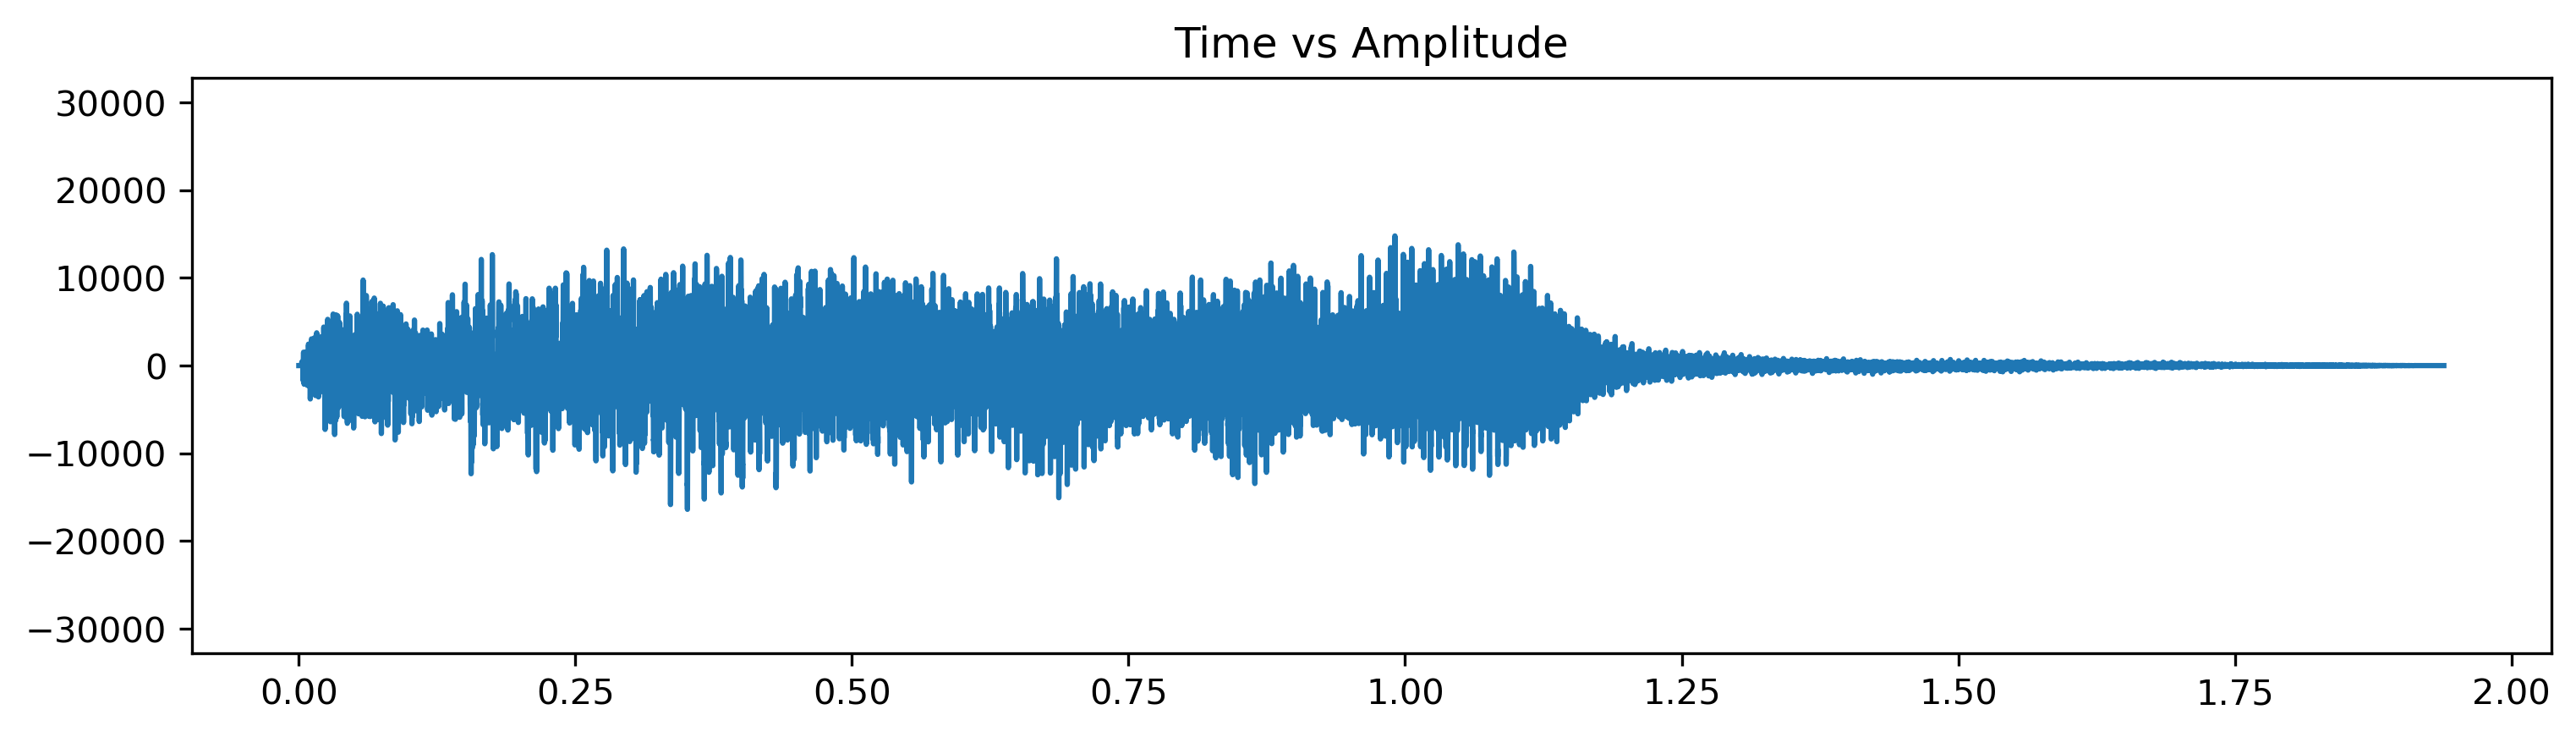

In [119]:
from scipy.io import wavfile
rate, samples = wavfile.read("tada.wav")
sound = SoundWave(rate,samples)
sound.plot()

### Problem 1.2

- Implement `SoundWave.export()`.
- Use the `export()` method to create two new files containing the same sound as `tada.wav`: one without scaling, and one with scaling (use `force=True`).
- Use `IPython.display.Audio()` to embed the original and new versions of `tada.wav` in the notebook.

In [120]:
IPython.display.Audio(filename="tada.wav")

In [121]:
sound.export("scaled_Tada.wav",force=True)
IPython.display.Audio(filename="scaled_Tada.wav")

In [122]:
sound.export("not_scaled_Tada.wav")
IPython.display.Audio(filename="not_scaled_Tada.wav")

### Problem 1.3

- Implement `generate_note()`.
- Use `generate_note()` to create an A tone that lasts for two seconds. Embed it in the notebook.

In [123]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 Hz.
    
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    steps = np.linspace(0,duration,44100*duration)
    sample = [np.sin(2*np.pi*i*frequency) for i in steps]
    soundwave = SoundWave(44100, sample)
    return soundwave

In [124]:
A_tone = generate_note(440,2)
A_tone.export("A_tone.wav")
IPython.display.Audio(filename="A_tone.wav")

### Problem 1.4

- Implement `SoundWave.__add__()`.
- Generate a three-second A minor chord (A, C, and E) and embed it in the notebook.
- Implement `SoundWave.__rshift__()`.
- Generate the arpeggio A$\,\rightarrow\,$C$\,\rightarrow\,$E, where each tone lasts one second, and embed it in the notebook.

In [125]:
#generate A, C, E
A_tone = generate_note(440,3)
C_tone = generate_note(523.25,3)
E_tone = generate_note(659.25,3)


#add together
AC = A_tone+C_tone
ACE = AC+E_tone

#play sound
ACE.export("AEC_tone.wav")
IPython.display.Audio(filename="AEC_tone.wav")

In [127]:
#generate new A, C, E
A_tone = generate_note(440,1)
C_tone = generate_note(523.25,1)
E_tone = generate_note(659.25,1)

#concatenate A, C, E
AC = A_tone >> C_tone
ACE = AC >> E_tone

#play sound
ACE.export("ACE_tone.wav")
IPython.display.Audio(filename="ACE_tone.wav")

### Problem 1.5

- Implement `simple_dft()` with the formula $c=F_nf$, where $F_n$ is the n-dimensional DFT matrix.
- Use `np.allclose()` to check that `simple_dft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [129]:
def simple_dft(samples):
    """Compute the DFT of an array of samples.

    Parameters:
        samples ((n,) ndarray): an array of samples.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    #get n and calculate F_n
    n = len(samples)
    l = np.arange(n)
    k = l[:,np.newaxis]
    #multiply F_n by samples
    F_n_f = 1/n*np.exp(-2*np.pi*1j*k*l*(1/n))@samples
    return F_n_f

In [132]:
#check if all close
from scipy import fftpack
A = np.random.random(2048)
np.allclose(simple_dft(A), 1/2048*fftpack.fft(A))

True

### Problem 1.6

- Implement `simple_fft()`.
- Generate an array of $8192$ random samples and take its DFT using `simple_dft()`, `simple_fft()`, and `scipy.fftpack.fft()`.
Print the runtimes of each computation.
- Use `np.allclose()` to check that `simple_fft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [149]:
def simple_fft(samples, threshold=1):
    """Compute the DFT using the FFT algorithm.
    
    Parameters:
        samples ((n,) ndarray): an array of samples.
        threshold (int): when a subarray of samples has fewer
            elements than this integer, use simple_dft() to
            compute the DFT of that subarray.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    #define helper function g
    def split(g):
        n = len(g)
        w = np.exp((2*np.pi*1j)/n)
        if n <= threshold:
            #return gFnf
            row = np.arange(n)
            grid = row*row[:,None]
            return w**-grid.dot(g)
        else:
            #get even and odd DFT's
            even = split(g[::2])
            odd = split(g[1::2])
            #calculate the exponential parts of the sum
            z = w**np.arange(n)
            m = n//2
            z_m = z[:m]*odd
            zm_ = z[m:]*odd
            #concatenate two arrays of length m
            return np.concatenate((even+z_m,even+zm_))
    return split(samples)/len(samples)
            

In [151]:
#time all
from scipy import fftpack
A = np.random.random(8192)

%time fdft = simple_dft(A)
%time fft = len(A) * simple_fft(A)
%time scifyFFT = fftpack.fft(A)

#check if allclose
print()


CPU times: user 3.65 s, sys: 2.41 s, total: 6.06 s
Wall time: 6.22 s
CPU times: user 252 ms, sys: 34.2 ms, total: 286 ms
Wall time: 187 ms
CPU times: user 511 µs, sys: 483 µs, total: 994 µs
Wall time: 3.22 ms


### Problem 1.7

- Modify `SoundWave.plot()` so that it accepts a boolean. When the boolean is `True`, take the DFT of the stored samples and plot (in a new subplot) the frequencies present on the $x$-axis and the magnituds of those frequences on the $y$-axis. Only the display the first half of the plot, and adjust the $x$-axis so that it correctly shows the frequencies in Hertz.
- Display the plot of the DFT of an A tone.
- Display the plot of the DFT of an A minor chord.

### Problem 1.8

Use the DFT to determine the individual notes that are present in `mystery_chord.wav`.

The notes are...

<h2 align="center">Part 2: Convolution and Filtering.</h2>

### Problem 2.1

- Implement `SoundWave.__mul__()` for circular convolution.
- Generate 2 seconds of white noise at the same sample rate as `tada.wav`.
- Compute the circular convolution of `tada.wav` and the white noise. Embed the result in the notebook.
- Append the circular convolution to itself and embed the result in the notebook.

### Problem 2.2

- Implement `SoundWave.__pow__()` for linear convolution.
- Time the linear convolution of `CGC.wav` and `GCG.wav` using `SoundWave.__pow__()` and `scipy.signal.fftconvolve()`.
- Embed the two original sounds and their convolutions in the notebook. Check that the convolutions with `SoundWave.__pow__()` and `scipy.signal.fftconvolve()` sound the same.

### Problem 2.3

Use `SoundWave.__pow__()` or `scipy.signal.fftconvolve()` to compute the linear convolution of `chopin.wav` and `balloon.wav`.
Embed the two original sounds and their convolution in the notebook.

### Problem 2.4

- Implement `SoundWave.clean()`.
- Clean `noisy1.wav` by filtering out frequencies from $1250$-$2600$ Hz. Embed the original and the cleaned versions in the notebook.
- Clean `noisy2.wav`. Embed the original and the cleaned versions in the notebook.

### Problem 2.5

- Clean `vuvuzela.wav` by filtering bad frequencies out of the left and right channels individually.
- Recombine the left and right channels and embed the result in the notebook.

### Problem 2.6

- Clean up `license_plate.png` so that the year printed on the sticker in the bottom right corner of the plate is legible.
- Display the original and cleaned images.

The year on the sticker is...